In [25]:
import numpy as np

Target:
- F$\Delta$t = 1280 N*s

Propellant:
- Ethanol (C2H5OH) + Oxygen Gas (O2)
- 2C2H8O2(l) + 6O2(g) → 4CO2(g) + 8H2O(l)

## Sketch of the results

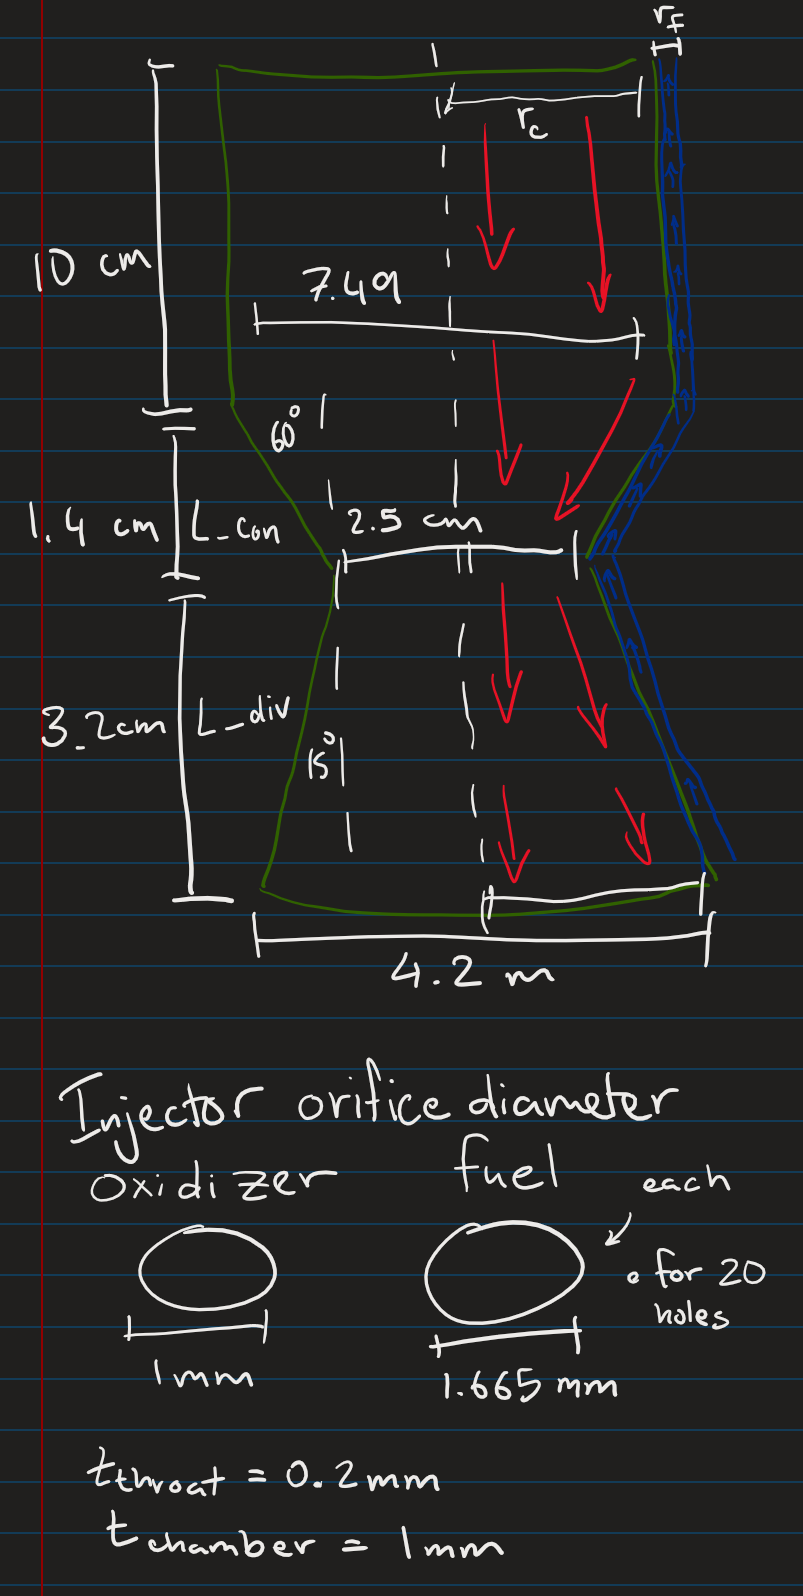


Assumes/Input parameters:

In [72]:
# Universal gas constant [J/K*mol]
Ru = 8.314 
# Molecular weight of Ethanol water mixture [g/mol]
M = 22
# Gravity [m/s^2]
g = 9.81
# gamma for ideal gas (Cp/Cv)
ga = 1.216
# Characteristic velocity[m/s]
cstar = 1645
# Mixture ratio (O/F) 
r = 1.3
# Thrust [N]  
F = 1000
# Specific impulse [sec]
Isp = 228
# Chamber Pressure [Pa]
Pc = 1500000
# Specific gas constant of the propellant []
Rs = Ru/M 
# Chamber temperature [K]
Tc = 3030
# Atmosphere pressure [Pa]
Patm = 101350

In [73]:
# The total propellant flow rate [kg/s]
w = (F/Isp)/g

# Fuel flow rate
wf = w/(r+1)

# Oxygen flow rate
wo = w - wf

print(f'total mass flow rate={w:.3e} kg/s, fuel flow rate={wf:.3e} kg/s, oxidizer flow rate={wo:.3e} kg/s')
print(w,wf,wo)

total mass flow rate=4.471e-01 kg/s, fuel flow rate=1.944e-01 kg/s, oxidizer flow rate=2.527e-01 kg/s
0.4470912244934456 0.19438748891019378 0.2527037355832519


In [74]:
# Nozzel parameters
Tt = Tc * (1/(1+((ga-1)/2)))
                
Pt = Pc * ((1+((ga-1)/2))**-(ga/(ga-1)))

Cf = (Isp*g)/cstar

At = F/(Pc*Cf)

Dt = ((4*At)/np.pi)**0.5

print(f'Throat Temperature={Tt:.3e} K, Throat Pessure={Pt:.3e} Pa, Throat Area={At:.3e} m^2, Throat Diameter={Dt:.3e} m')

Throat Temperature=2.735e+03 K, Throat Pessure=8.421e+05 Pa, Throat Area=4.903e-04 m^2, Throat Diameter=2.499e-02 m


In [81]:
# Exit parameters
# Degree of the diverging part of the nozzle
alpha = 15*(np.pi/180)
Me = ((2/(ga-1))*(((Pc/Patm)**((ga-1)/ga))-1))**0.5

Ae = (1/Me)*((2/(ga+1))*(1+((ga-1)/2)*Me**2))**((ga+1)/(2*(ga-1)))*At

De = (4*Ae/np.pi)**0.5

L_div = (De - Dt)/(2*np.tan(alpha))

print(f'Mach Number at the exit = {Me:.3f} ; Exit Area = {Ae:.3e} m^2 ; Exit Diameter = {De:.3e} m^2')
print(L_div)

Mach Number at the exit = 2.384 ; Exit Area = 1.416e-03 m^2 ; Exit Diameter = 4.246e-02 m^2
0.03260222003143724


In [76]:
# Assume the characteristic chamber length (L) is approx. 1.5 m , Dc = 5Dt , & Vconver = (1/10)Vc
L = 1
Dc = 3*Dt
# Degree of the converging part of the nozzle
beta = 60*(np.pi/180)

L_con = (Dc - Dt)/(2*np.tan(beta))

Ac = ((Dc**2)*np.pi)/4

Vc = L*At

Lc = Vc/(1.1*Ac)

print(f'Combustion Chamber Surface Area={Ac:.3e} m^2, Combustion Chamber Volume={Vc:.3e} m^3, Length of Combustion Chamber={Lc:.3e} m')
print(Ac,Dc,Lc,L_con)

Combustion Chamber Surface Area=4.413e-03 m^2, Combustion Chamber Volume=4.903e-04 m^3, Length of Combustion Chamber=1.010e-01 m
0.004412790385750308 0.0749569157700904 0.10101010101010101 0.014425465165828603


In [77]:
# thickness of the throat and chamber
# Assume stress (s) is approximately 8000 psi or 55e6 Pa [1]
s = 55.15e6
tt = (Pt*Dt)/(2*s)

tc = (Pc*Dc)/(2*s)

# The area of the chamber and the converging part of the nozzle

# As = (np.pi*(Dc+2*tc)*Lc)*1.1
#As={As:.3e}
print(f'Throat Wall Thickness={tt:.3e} m, Combustion Chamber Wall Thickness={tc:.3e} m')

Throat Wall Thickness=1.907e-04 m, Combustion Chamber Wall Thickness=1.019e-03 m


#### Note about the wall thickness calculation
- the chamber and throat thickness calculation is the minimum thickness. The actual wall thickness should be greater to accommodate for the buckling force, welding, and stress concenstration [1,p18] 

In [78]:
# Injector for the fuel

# density of fuel at room temperature [kg/m^3]
RHO_fuel = 885

# volume flow rate is calculated as m^3/s
conversion_Lpermin = 60000
Vdot = (wf/RHO_fuel)*conversion_Lpermin

print(f'Volume flow rate of the fuel is {Vdot}L/min')

Volume flow rate of the fuel is 13.178812807470765L/min


Given the calculated required volume flow rate of approx. 13.17L/m. The design below would satisfied the required flow rate.

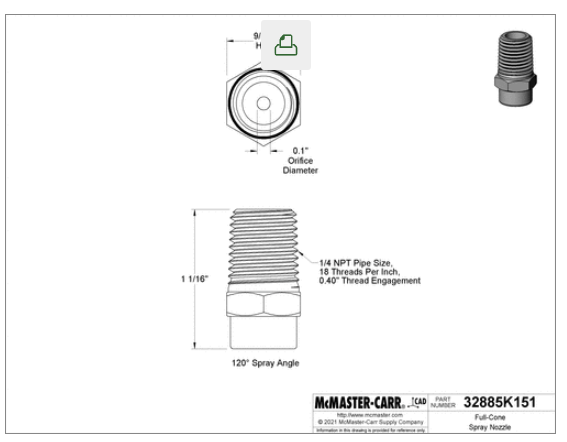

The nozzel can operate up to approximate 16.6 L/min which is above our required flow rate.

Link to the fuel injector design and dimension:
- https://www.mcmaster.com/32885K151/

In [80]:
# Injector for the oxidizer
Cd = 0.7
# Ambient temperature is assumed 20 C at atmospheric pressure [K]
Ta = 293.15
# Ambient pressure is assumed at atmospheric pressure [atm]
Pa = 1
# [L*atm/mol*K]
Ru_den = 0.0821
# molecular mass of oxidizer
M_o = 32
# Density of oxidizer at ambient conditions
RHO_Oamb = (Pa*M_o)/(Ta*Ru_den)

# Pressure drop across the injector is commonly between 0.482*10^6 and 1.034*10^6 [Pa]
delta_Pinj = 1.034e6

# Oxidizer pressure at the injector 
Pinj = Pc + delta_Pinj

# Temperature at the injector is assumed as room temperature as well [K]
Tinj = 293.15

# Density of oxidizer at the injector [kg/m^3]
RHO_Oinj = RHO_Oamb*(Pinj/Patm)*(Ta/Tinj)

# Total area of the oxidizer injector [m^2]
Ao = wo/(Cd*(2*RHO_Oinj*delta_Pinj)**0.5)

# For 20 holes, area of each injector is 
Ao_inj = Ao/20

Do = (4*Ao_inj/np.pi)**0.5

print(f'Area of each oxidizer injection is ={Ao_inj:.3e} m^2, Diameter for each oxidizer injection is={Do:.3e} m')

Area of each oxidizer injection is =2.177e-06 m^2, Diameter for each oxidizer injection is=1.665e-03 m


### References:

- [1] L. J. Krzycki, HOW to DESIGN, BUILD and TEST SMALL LIQUID-FUEL ROCKET ENGINES. CA, USA: Rocketlab, 1967.
- [2] http://www.diva-portal.org/smash/get/diva2:1375729/FULLTEXT01.pdf
- [3] G. P. Sutton and O. Biblarz, Rocket Propulsion Elements, 9th ed. NJ, USA: John Wiley & Sons, Inc., 2017.